In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy.stats import norm

## Daten laden

In [2]:
connection = sql.connect("gcs_gh_10012022.db")

query_temp1 = '''SELECT * FROM s1_temp'''
query_temp2 = '''SELECT * FROM s2_temp'''
query_hum1 = '''SELECT * FROM s1_hum'''
query_hum2 = '''SELECT * FROM s2_hum'''

df_temp_marcel = pd.read_csv('new_north_temp.csv', index_col=['time'])
df_temp1 = pd.read_sql_query(query_temp1, connection, parse_dates=['timestamp'], index_col=['timestamp'])
df_temp2 = pd.read_sql_query(query_temp2, connection, parse_dates=['timestamp'], index_col=['timestamp'])
df_hum1  = pd.read_sql_query(query_hum1, connection, parse_dates=['timestamp'], index_col=['timestamp'])
df_hum2 = pd.read_sql_query(query_hum2, connection, parse_dates=['timestamp'], index_col=['timestamp'])

## Daten - Informationen

In [3]:
df_temp_marcel.info()
print()
df_temp1.info()
print()
df_hum1.info()
print()
df_temp2.info()
print()
df_hum2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585405 entries, 1563189713031947986 to 1643624871000000000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    585405 non-null  object 
 1   value   585405 non-null  float64
dtypes: float64(1), object(1)
memory usage: 11.2+ MB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187413 entries, 2020-01-09 00:01:42 to 2022-01-10 13:37:02
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   value   187413 non-null  float64
dtypes: float64(1)
memory usage: 2.9 MB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187415 entries, 2020-01-09 00:01:42 to 2022-01-10 13:37:02
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   value   187415 non-null  float64
dtypes: float64(1)
memory usage: 2.9 MB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18

In [4]:
print("Temperature - GWH")
print(df_temp1.describe())
print()
print("Temperature - Marcel")
print(df_temp_marcel.describe())
print()
print("Humidity")
print(df_hum1.describe())

Temperature - GWH
               value
count  187413.000000
mean       19.279055
std         6.205573
min         6.267643
25%        14.516290
50%        17.904940
75%        22.642100
max        46.306560

Temperature - Marcel
               value
count  585405.000000
mean       11.541289
std         7.212116
min       -10.370000
25%         5.540000
50%        10.950000
75%        17.270000
max        33.280000

Humidity
               value
count  187415.000000
mean       76.813432
std        13.779260
min        16.815440
25%        71.000225
50%        81.120010
75%        85.908300
max       100.000000


In [5]:
print(df_temp1.head())

                        value
timestamp                    
2020-01-09 00:01:42  13.51225
2020-01-09 00:06:42  13.55497
2020-01-09 00:11:43  13.59769
2020-01-09 00:16:43  13.62440
2020-01-09 00:21:44  13.66713


## Marcel's Wetterdaten

In [6]:
df_temp_marcel.drop('name', axis=1, inplace=True)

In [7]:
df_temp_marcel.index = pd.to_datetime(df_temp_marcel.index)
df_temp_marcel.index.name = 'timestamp'
print(df_temp_marcel)

                               value
timestamp                           
2019-07-15 11:21:53.031947986  18.74
2019-07-15 11:24:00.173862760  18.28
2019-07-15 11:26:07.300089259  17.57
2019-07-15 11:28:14.271875594  17.11
2019-07-15 11:30:21.356175851  17.17
...                              ...
2022-01-31 10:19:28.000000000   2.87
2022-01-31 10:21:34.000000000   2.83
2022-01-31 10:23:39.000000000   2.82
2022-01-31 10:25:45.000000000   2.78
2022-01-31 10:27:51.000000000   2.88

[585405 rows x 1 columns]


In [8]:
df_temp_ex = df_temp_marcel.sort_index().loc['2020-01-09':'2022-01-10']
df_temp_ex.resample('H').mean()

,value
timestamp,
2020-01-09 00:00:00,7.215517
2020-01-09 01:00:00,7.124643
2020-01-09 02:00:00,7.072143
2020-01-09 03:00:00,7.081786
2020-01-09 04:00:00,6.995862
...,...
2022-01-10 19:00:00,-0.254643
2022-01-10 20:00:00,-0.740000
2022-01-10 21:00:00,-1.043103


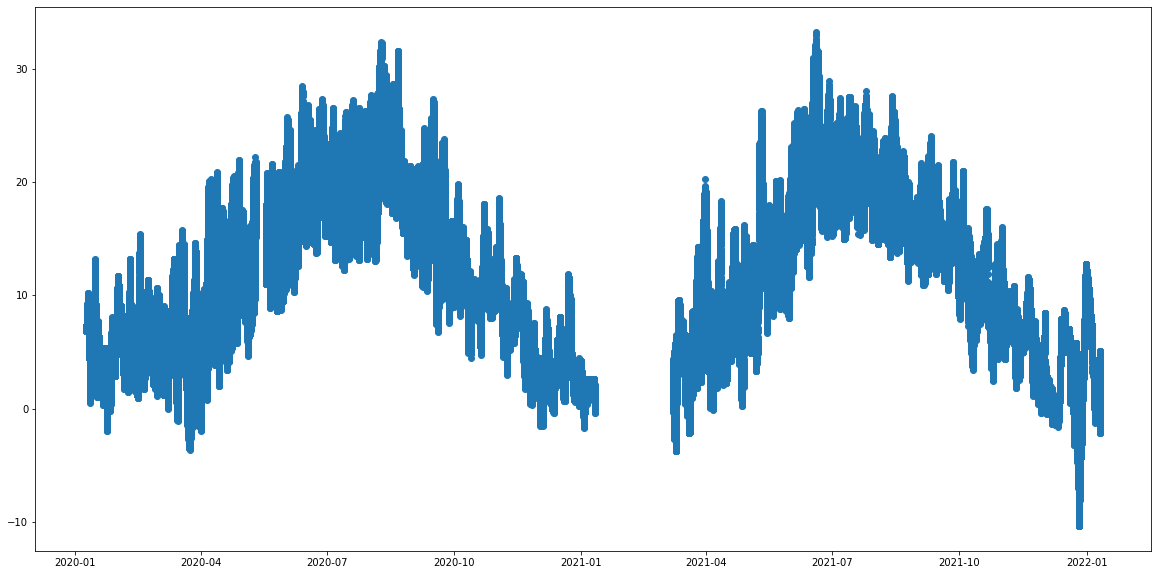

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df_temp_ex.index, df_temp_ex['value'])

--> clean dataset

In [10]:
df_temp1['Weekday'] = df_temp1.index.day_name()
df_temp1['Month'] = df_temp1.index.month
df_temp1['Year'] = df_temp1.index.year

# df_hum1['Weekday'] = df_hum1.index.day_name()
# df_hum1['Month'] = df_hum1.index.month
# df_hum1['Year'] = df_hum1.index.year

In [11]:
df_concat = pd.merge_asof(df_hum1.sort_index(), df_temp1.sort_index(), on="timestamp")
df_concat
# temp1: 187413 entries
# hum1: 187415 entries

,timestamp,value_x,value_y,Weekday,Month,Year
0,2020-01-09 00:01:42,87.20073,13.51225,Thursday,1,2020
1,2020-01-09 00:06:42,87.26787,13.55497,Thursday,1,2020
2,2020-01-09 00:11:43,87.27702,13.59769,Thursday,1,2020
3,2020-01-09 00:16:43,87.31060,13.62440,Thursday,1,2020
4,2020-01-09 00:21:44,87.43267,13.66713,Thursday,1,2020
...,...,...,...,...,...,...
187410,2022-01-10 13:17:02,87.18699,14.89814,Monday,1,2022
187411,2022-01-10 13:22:02,87.16868,15.02365,Monday,1,2022
187412,2022-01-10 13:27:02,86.69261,14.96757,Monday,1,2022
187413,2022-01-10 13:32:02,87.00389,14.95422,Monday,1,2022


In [12]:
print(df_concat[df_concat.index.duplicated()])

Empty DataFrame
Columns: [timestamp, value_x, value_y, Weekday, Month, Year]
Index: []


In [13]:
# replace NaN-values

In [14]:
#remove outliers

--> visualize data

<AxesSubplot:>

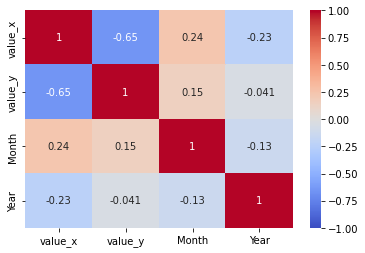

In [15]:
sns.heatmap(df_concat.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm') #nan-values, outliers

(0.0, 100.0)

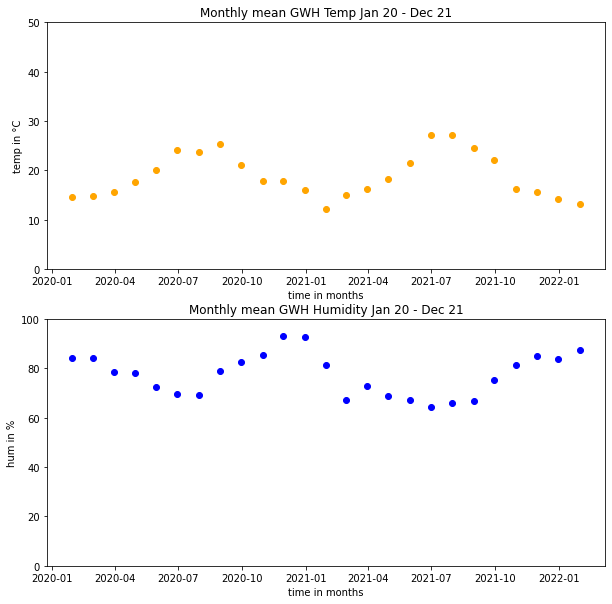

In [16]:
plt.rcParams.update({'font.size': 10})
monthly_temp1 = df_temp1.resample('M').mean()
# print(monthly_temp1)

monthly_hum1 = df_hum1.resample('M').mean()
# print(monthly_hum1)

fig,ax = plt.subplots(2, figsize=(10, 10))

# sns.scatter(monthly_temp1.index.values,  monthly_temp1['value'])
ax[0].scatter(monthly_temp1.index.values,
           monthly_temp1['value'],
           color='orange')
ax[0].set(xlabel="time in months",
       ylabel="temp in °C",
       title="Monthly mean GWH Temp Jan 20 - Dec 21")
ax[0].set_ylim(bottom=0, top=50)

ax[1].scatter(monthly_hum1.index.values,
           monthly_hum1['value'],
           color='blue')
ax[1].set(xlabel="time in months",
       ylabel="hum in %",
       title="Monthly mean GWH Humidity Jan 20 - Dec 21")
ax[1].set_ylim(bottom=0, top=100)



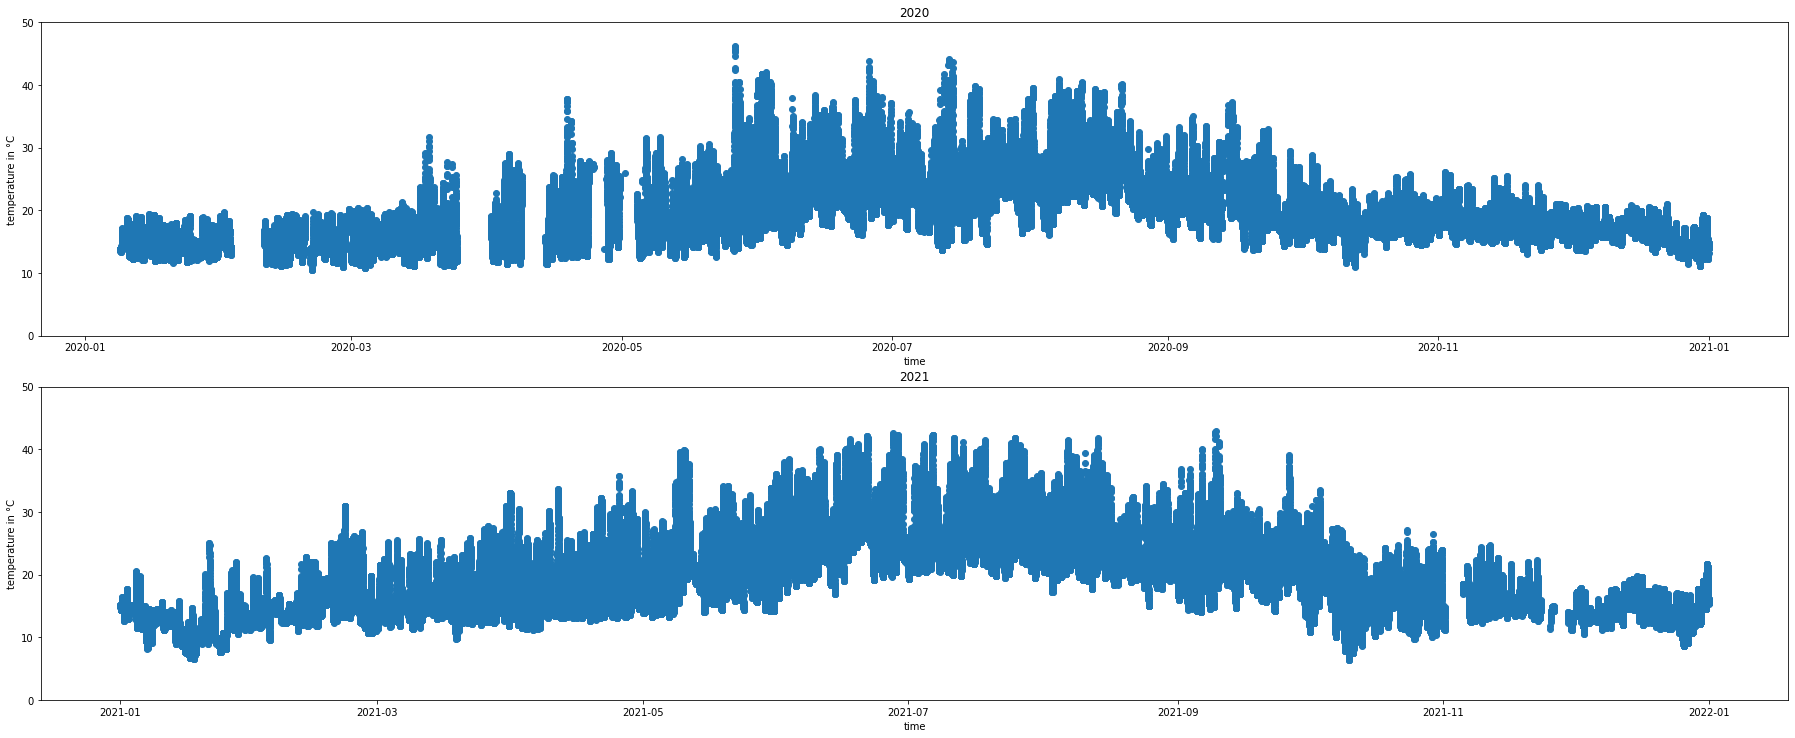

In [17]:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(25, 10))
fig.tight_layout(h_pad=3)

ax0.set_title("2020")
ax0.set_xlabel("time")
ax0.set_ylabel("temperature in °C")

ax1.set_title("2021")
ax1.set_xlabel("time")
ax1.set_ylabel("temperature in °C")

ax0.scatter(df_temp1.loc['2020'].index, 'value', data=df_temp1.loc['2020'])
ax1.scatter(df_temp1.loc['2021'].index, 'value', data=df_temp1.loc['2021'])


for ax in [ax0,ax1]:
    ax.set_ylim(bottom=0, top=50)

In [18]:
df_temp1.loc['2020'].describe()

,value,Month,Year
count,88671.000000,88671.000000,88671.0
mean,19.386155,6.880389,2020.0
std,5.511220,3.395825,0.0
min,10.502780,1.000000,2020.0
25%,15.461590,4.000000,2020.0
50%,18.062490,7.000000,2020.0
75%,22.102690,10.000000,2020.0
max,46.306560,12.000000,2020.0


In [19]:
df_temp1.loc['2021'].describe()

,value,Month,Year
count,96127.000000,96127.000000,96127.0
mean,19.344405,6.399263,2021.0
std,6.765985,3.395808,0.0
min,6.339741,1.000000,2021.0
25%,13.936820,3.000000,2021.0
50%,17.904940,6.000000,2021.0
75%,23.363090,9.000000,2021.0
max,42.990010,12.000000,2021.0


(0.0, 50.0)

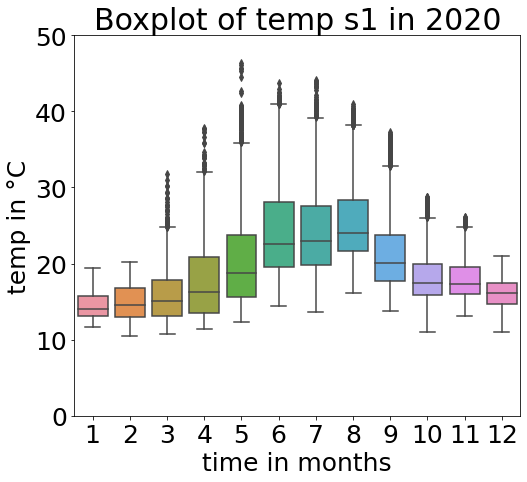

In [20]:
fig, ax = plt.subplots(figsize=(8, 7))
df_temp1_2020 = df_temp1.loc['2020']
df_temp1_2021 = df_temp1.loc['2021']

sns.boxplot(data=df_temp1_2020, x='Month', y='value')
ax.set_title('Boxplot of temp s1 in 2020')
ax.set_ylabel('temp in °C')
ax.set_xlabel('time in months')

ax.set_ylim(0, 50)

(0.0, 50.0)

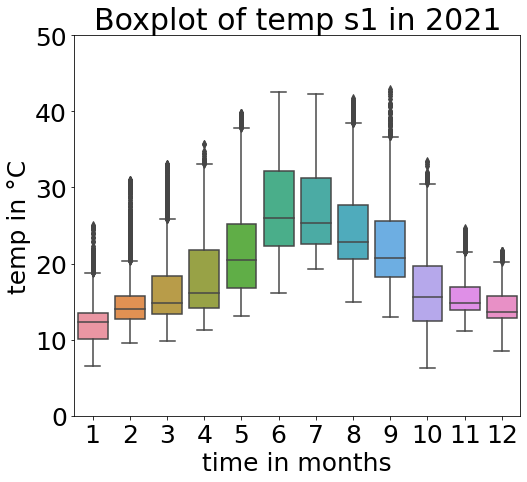

In [21]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(data=df_temp1_2021, x='Month', y='value')
ax.set_title('Boxplot of temp s1 in 2021')
ax.set_ylabel('temp in °C')
ax.set_xlabel('time in months')

ax.set_ylim(0, 50)

#  Optimalstes Mooswachstum verzeichnet (nach 10 Wochen fertige Matten) 
* ab August bis September - Oktober

## Zeitraum

In [26]:
df_concat = df_concat.set_index(['timestamp'])

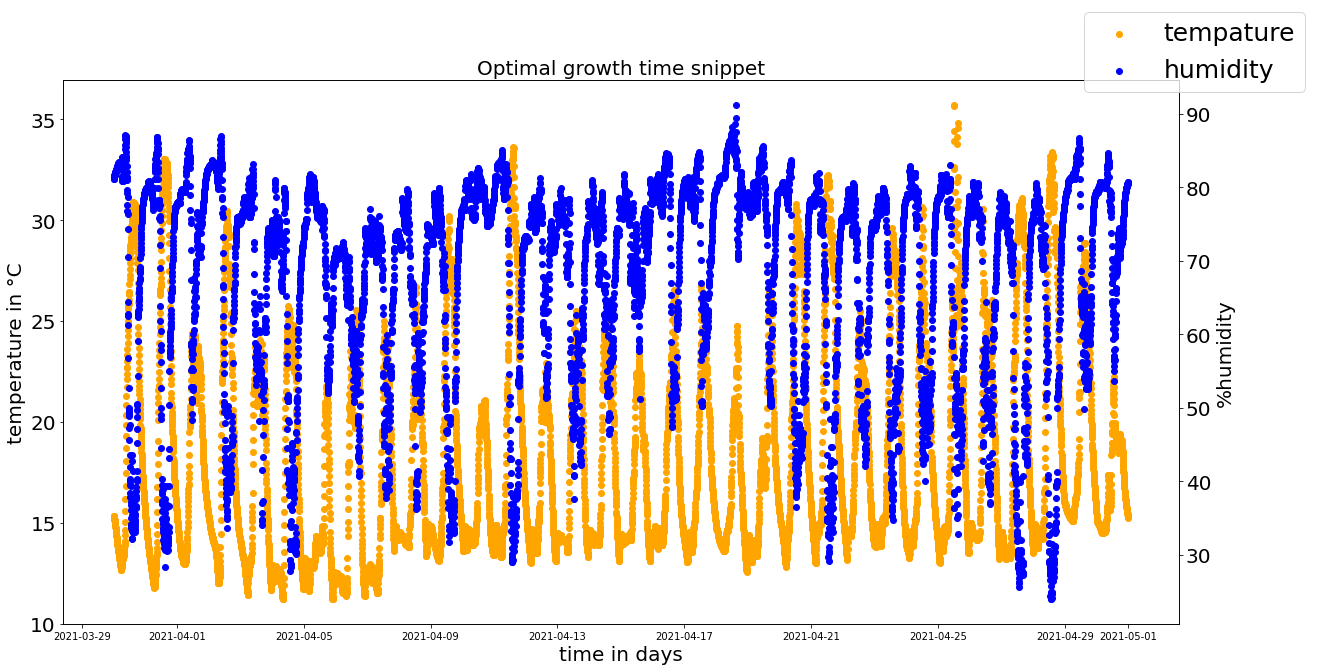

In [51]:
optm_growth = df_concat.sort_index().loc['2021-03-30':'2021-04-30']

fig,ax = plt.subplots(figsize=(20,10))

ax.set_title('Optimal growth time snippet', size=20)
ax.set_ylabel('temperature in °C', fontsize = 20) 
ax.set_xlabel('time in days', fontsize = 20)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=20)
ax.scatter(optm_growth.index, optm_growth['value_y'], color='orange', label="tempature")

ax = ax.twinx()
ax.set_ylabel('%humidity', fontsize = 20) 
ax.tick_params(axis='y', labelsize=20)
ax.scatter(optm_growth.index, optm_growth['value_x'],color='blue', label="humidity")
fig.legend()

<AxesSubplot:>

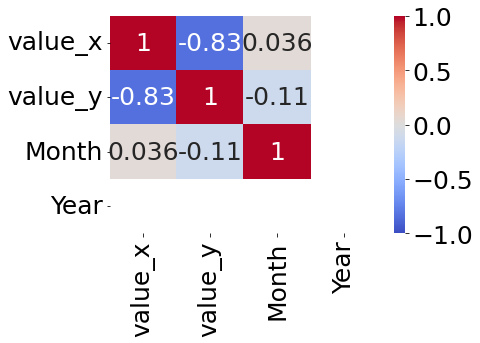

In [28]:
sns.heatmap(optm_growth.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## Zeitpunkt

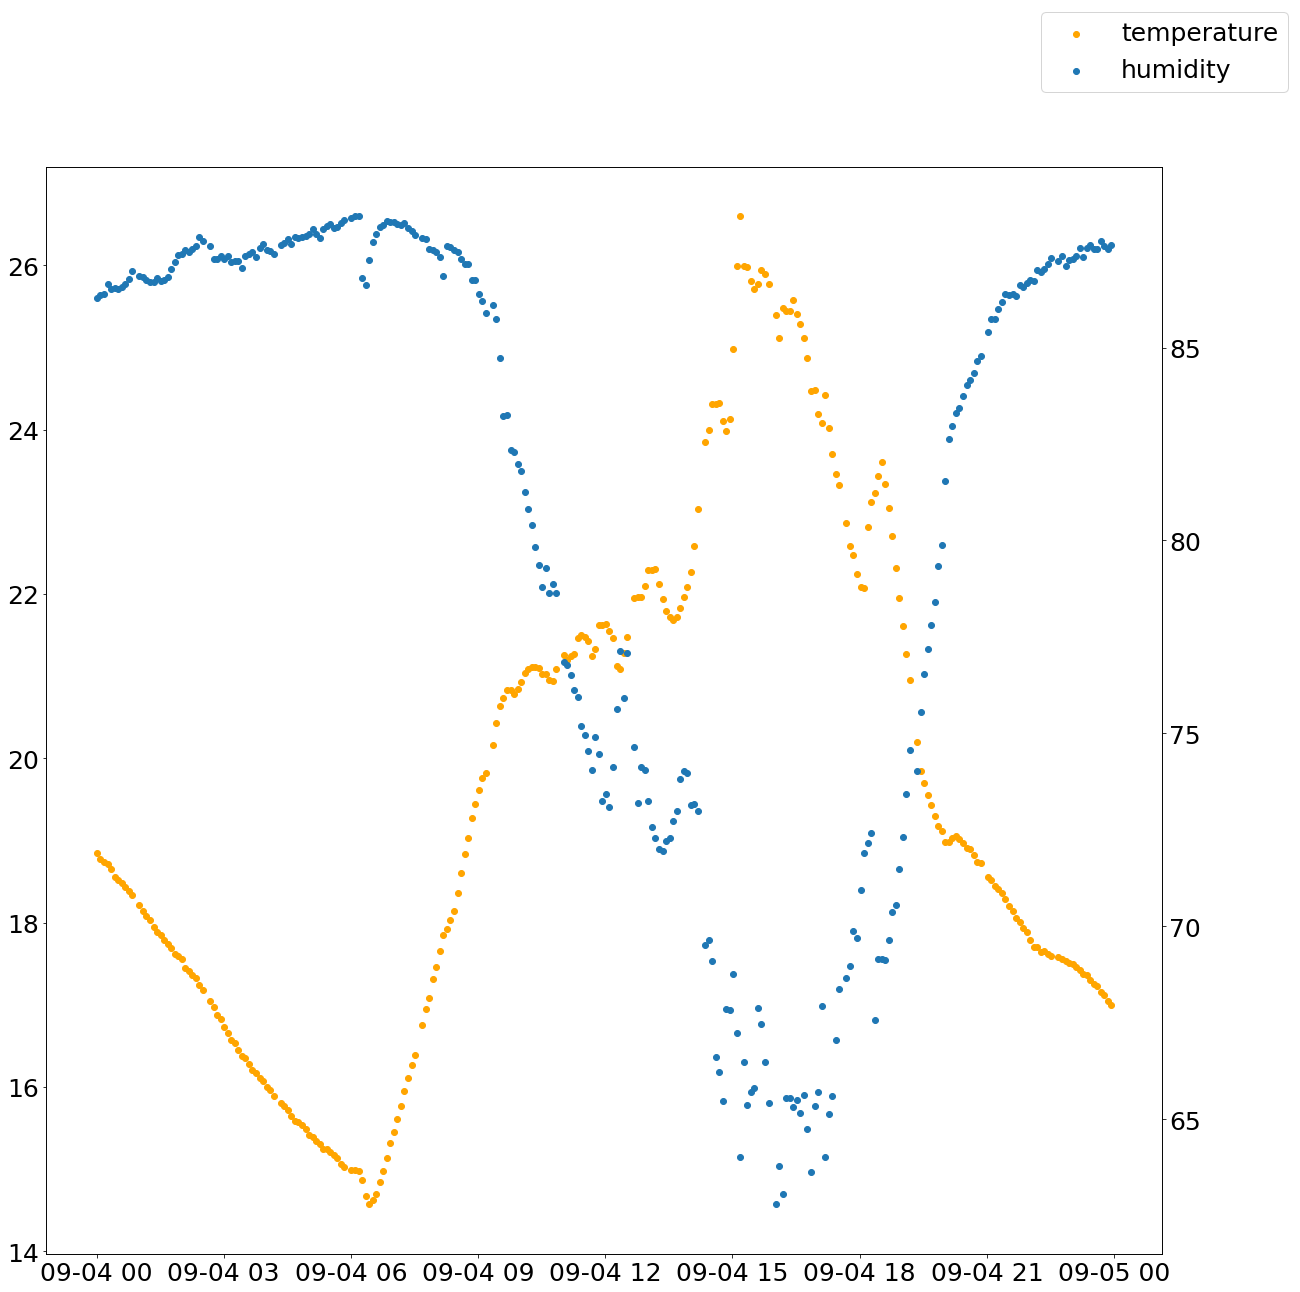

In [29]:
optm_growth = df_concat.sort_index().loc['2021-09-04':'2021-09-04']

fig,ax =  plt.subplots(figsize=(20,20))

ax.scatter(optm_growth.index, optm_growth['value_y'], label = "temperature", color='orange')
ax = ax.twinx()
ax.scatter(optm_growth.index, optm_growth['value_x'], label = "humidity")

fig.legend()

<AxesSubplot:>

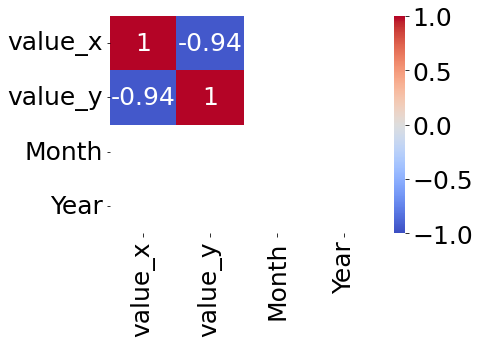

In [30]:
sns.heatmap(optm_growth.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [31]:
connection.close()